In [2]:
from tensorflow.keras.datasets.mnist import load_data

mnist = load_data()
(X_train, y_train), (X_test, y_test) =  mnist
X_flatten_train = X_train.reshape(60000, 28*28)
X_flatten_test = X_test.reshape(10000, 28*28)

In [3]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


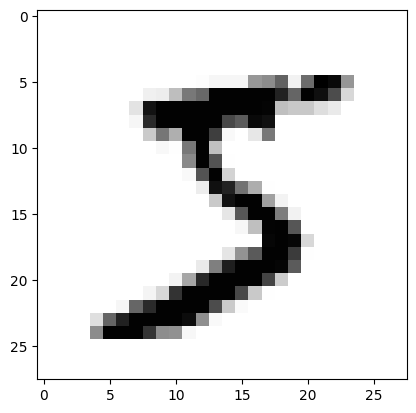

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')

In [5]:
# tf.keras.Sequential(
#     layers=None, trainable=True, name=None
# )

# tf.keras.layers.ReLU(
#     max_value=None, negative_slope=0.0, threshold=0.0, **kwargs
# )
from tensorflow.keras import Sequential , Input
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import ReLU ,Dense ,Softmax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

#muti classification 에서 loss func 게산을 위해서는 one_hot_encoding 해야 한다.
y_train_onehot = to_categorical(y_train , num_classes=10)
y_test_onehot = to_categorical(y_test , num_classes=10)

relu = ReLU()
softmax = Softmax()

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512 , activation=relu))
model.add(Dense(10 , activation=softmax))


categorical_crossentropy = CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='categorical_crossentropy'
)

model.compile(loss=categorical_crossentropy , optimizer='adam', metrics=['accuracy'])

model.fit(x_flatten_train , y_train_onehot , epochs=20 , batch_size=128)



Epoch 1/20
469/469 [==============================] - 9s 16ms/step - loss: 4.3628 - accuracy: 0.9083
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.5752 - accuracy: 0.9566
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.3020 - accuracy: 0.9675
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.2185 - accuracy: 0.9733
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1837 - accuracy: 0.9761
Epoch 6/20
469/469 [==============================] - 9s 18ms/step - loss: 0.1565 - accuracy: 0.9779
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2148 - accuracy: 0.9756
Epoch 8/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1949 - accuracy: 0.9768
Epoch 9/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1832 - accuracy: 0.9769
Epoch 10/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1601 - accura

NameError: name 'y_test_onhot' is not defined

In [7]:
model.evaluate(x_flatten_test, y_test_onehot)

313/313 [==============================] - 2s 4ms/step - loss: 0.5512 - accuracy: 0.9677


[0.5511603355407715, 0.9677000045776367]

In [16]:
model.predict(X_flatten_test)[0]

313/313 [==============================] - 1s 4ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
y_test[0]

7

In [21]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
MODEL_DIR='./model/cnn_model/'
modelpath="./model/cnn_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),\
                epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])


print(f"Test Accuracy{model.evaluate(X_test,y_test)[1]}")
y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



Epoch 1: val_loss improved from inf to 0.05826, saving model to ./model/cnn_model\01-0.0583.hdf5


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.05826 to 0.03971, saving model to ./model/cnn_model\02-0.0397.hdf5


KeyboardInterrupt: 

In [22]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 2s 0us/step


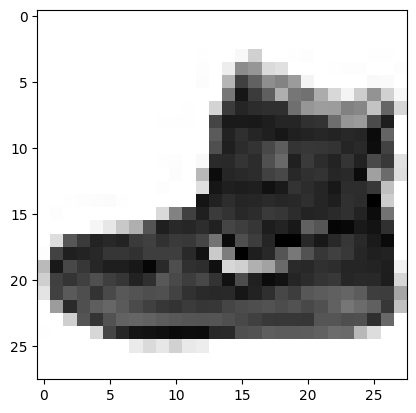

In [23]:
plt.imshow(x_train[0] , cmap='Greys')

In [24]:
y_train[0]

9

In [25]:
import sys

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	13	73	0	0	1	4	0	0	0	0	1	1	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	0	36	136	127	62	54	0	0	0	1	3	4	0	0	3	
0	0	0	0	0	0	0	0	0	0	0	0	6	0	102	204	176	134	144	123	23	0	0	0	0	12	10	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	155	236	207	178	107	156	161	109	64	23	77	130	72	15	
0	0	0	0	0	0	0	0	0	0	0	1	0	69	207	223	218	216	216	163	127	121	122	146	141	88	172	66	
0	0	0	0	0	0	0	0	0	1	1	1	0	200	232	232	233	229	223	223	215	213	164	127	123	196	229	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	183	225	216	223	228	235	227	224	222	224	221	223	245	173	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	193	228	218	213	198	180	212	210	211	213	223	220	243	202	0	
0	0	0	0	0	0	0	0	0	1	3	0	12	219	220	212	218	192	169	227	208	218	224	212	226	197	209	52	
0	0	0	0	0	0	0	0	0	0	6	0	99	244	222	220	218	203	198	221	215	213	222	220	245	119	167	56	
0	0	0	0	0	0	0	0	0	4	0	0	55	236	228	230	22

In [ ]:
X_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
X_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)


model=Sequential()
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
MODEL_DIR='./model/cnn_model/'
modelpath="./model/cnn_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),\
                epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])


print(f"Test Accuracy{model.evaluate(X_test,y_test)[1]}")
y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
from tensorflow.keras.utils import load_img , img_to_array 
from tensorflow.keras.applications  import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = './image/Elephant.jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 1s 550ms/step


In [27]:
features

array([[[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 31.391289 , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 35.765556 , ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [ 0.       ,  0.       , 20.278324 , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 14.858583 , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ]],

        [[42.847218 ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [45.906498 ,  0.       , 43.489086 , ...,  0.       ,
           0.       ,  0.       ],
         [35.936615 ,  0.       , 45.282692 , ...,  5.552777 ,
           0.       ,  0.       ],
         ...,
         [ 2.572698 ,  0.       , 34.70686  , ...,  0.       ,
           0.       ,  0.